<a href="https://colab.research.google.com/github/CT-Cultures/Content/blob/master/RegOverview_Issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [1] Setting up Environment and Install Requirements

In [31]:
# Load Module
import os
import sys
import gc
import pandas as pd
from bs4 import BeautifulSoup
import re

# Load Local Lib# Set Path
path_wd = '/content/drive/MyDrive/Github/Content'
os.chdir(path_wd)

from sources.NRTA.Record_Registration import Registration # assume relative path at path_wd

tv_reg = Registration()

## 1.3 Load Latest Registration Publication

In [32]:
os.chdir(path_wd + '/sources/NRTA')
##########################################

df = pd.read_json('/content/drive/MyDrive/Github/Content/sources/NRTA/records/contents_of_registrations.json')
curr_issue_dt = df.sort_values(['公示年月'], ascending=False)['公示年月'].iloc[0]
df_curr = df[df['公示年月'] == curr_issue_dt].copy()

In [15]:
# clean df, run mulitple times as necessary
df['许可证号'] = df['许可证号'].apply(lambda x:
                    x.lstrip('\n+').lstrip('\t+').lstrip('\w+').rstrip('\t+').rstrip('\n+'))
df['备注'] = df['备注'].apply(lambda x:
                    x.lstrip('\n+').lstrip('\t+').lstrip('\w+').rstrip('\t+').rstrip('\n+'))

In [33]:
df_curr = df[df['公示年月'] == curr_issue_dt].copy()
df_curr.head(2)

,剧名,集数,报备机构,题材,内容提要,公示年月,许可证号,体裁,拍摄日期,制作周期,省级管理部门备案意见,相关部门意见,备注
0,铁军,40,大瑭影业（北京）有限公司,当代军旅,1984年，二十万铁道兵脱下军装成为一支不穿军装的“铁军”。尚武和他儿子尚志同共同负责的尖刀...,2021年6月,\n\t\t\t许可证号：（京）字第5917号\n\t\t,一般,2020.12,18个月,同意备案，报请总局电视剧司公示。,,\n\t\n\t\t\n \n\t \n
1,雪影追踪,30,北京雪桃影视文化有限责任公司,近代革命,1945年8月15日日本投降，共同抗日的国共双方特工从战友变成敌人，在东北雪城展开了一场收编...,2021年6月,\n\t\t\t许可证号：（京）字第15190号\n\t\t,一般,2021.9,6个月,同意备案，报请总局电视剧司公示。,已征求国家安全部宣传教育局剧本审读意见。,\n\t\n\t\t\n \n\t \n


# [2] Generating Article Contents

##[2.1] 2021年6月电视剧备案划重点

In [19]:
# Title
T1 = '{}电视剧备案划重点'.format(df_curr['公示年月'][0])


print(T1)

2021年6月电视剧备案划重点


##[2.2] 	XXXX年XX月XX日,XX月整月的备案公示新鲜出炉！这一批次中，最遥远的项目是《熊猫传奇——黑洞之吻》,备案号为影特备字〔2021〕第006号,最近期的项目是《幕后英雄》,备案号为影剧备字〔2021〕第1360号。本次完成备案的共计故事影片229部、科教影片8部、纪录影片6部、动画影片6部以及特种影片1部。


In [ ]:
# Obtain Variables
df_curr.loc[:,'公示日期'] = df_curr.loc[:,'公示日期'].astype('datetime64')
pub_year = df_curr.loc[0,'公示日期'].year
pub_month = df_curr.loc[0,'公示日期'].month
pub_day = df_curr.loc[0,'公示日期'].day
df_curr['备案申请年份'] = df_curr['备案申请年份'].astype('int')
df_curr_sorted = df_curr.sort_values(['备案申请年份', '备案立项年度顺序号'], ascending=True).reset_index(drop=True)
df_type = df_curr.groupby('电影类别')['电影类别'].count().sort_values(ascending=False).rename('数量').to_frame().reset_index()

# Write Content
T2 = '\t'
T2 += '{year}年{month}月{day}日，'.format(year=pub_year, month=pub_month, day=pub_day)
T2 += '{month}月{part_of_month}的备案公示新鲜出炉！'.format(month=df_curr.loc[0,'公示批次起始'][1], part_of_month=df_curr.loc[0,'公示批次起始'][2])
T2 += '这一批次中，最遥远的项目是《{}》，'.format(df_curr_sorted.loc[0, '片名']) 
T2 += '备案号为{}，'.format(df_curr_sorted.loc[0, '备案立项号'])
T2 += '最近期的项目是《{}》，'.format(df_curr_sorted.loc[df_curr.shape[0]-1, '片名'])
T2 += '备案号为{}。'.format(df_curr_sorted.loc[df_curr.shape[0]-1, '备案立项号'])
T2 += '本次完成备案的共计'
for i, row in df_type.iterrows():
  if i == df_type.shape[0]-1:
    T2 = T2.rstrip('、')
    T2 += '以及{type}{n}部。'.format(type=row['电影类别'], n=row['数量'])
  else:
    T2 += '{type}{n}部、'.format(type=row['电影类别'], n=row['数量'])
print(T2)

	2021年7月2日，5月整月的备案公示新鲜出炉！这一批次中，最遥远的项目是《大道同行》，备案号为影重备字〔2019〕第6号，最近期的项目是《落日迷情》，备案号为影剧备字〔2021〕第1916号。本次完成备案的共计故事影片196部、纪录影片16部、科教影片7部、动画影片6部以及特种影片3部。


##[2.3] 	本批次中，大数据分析识别出XX部上市影视公司关联项目，占比XX%。慷田AI聚焦关注的有

In [23]:
# 本批次中与上市影视公司关联的项目有
info_public_film_co = pd.read_csv('/content/drive/MyDrive/Github/Content/tools/articles/reference/info_public_film_co.csv', index_col=0, encoding='utf-8-sig')
ls = info_public_film_co['公司简称'].apply(eval).sum()
pat_public = '|'.join(ls)
pat_public += '|阿里|腾讯|爱奇艺|英皇|寰亚|银都|美亚|大盛|儒意|灿星|横店|华策|电视剧制作中心'
df_focus = df_curr.loc[df_curr['报备机构'].str.contains(pat_public), :]
df_focus

,剧名,集数,报备机构,题材,内容提要,公示年月,许可证号,体裁,拍摄日期,制作周期,省级管理部门备案意见,相关部门意见,备注
22,沸腾的血脉,40,中视佳品（南京）文化传媒有限公司,当代都市,江大桥生于建筑之家，但从小喜爱文学，与父亲希望自己从事建筑业的心愿背道而驰。一次江难中母亲不...,2021年6月,许可证号：（苏）字第02407号,一般,2021.10,7个月,同意备案，报请总局电视剧管理司公示。,,\n\t


In [29]:
df_curr.groupby('题材')['制作周期'].sort_values(ascending=True)

AttributeError: ignored

In [ ]:
ids = [30,47,69]
df_focus_narrowed = df_curr.loc[ids, ['电影类别', '片名', '备案单位', '编剧', '梗概', '备案地']]
ls_ptitles = []
for content in df_focus_narrowed['梗概'].tolist():
    ls_ptitles.append(''.join(autotitle.generate(content,1)).lower())
#ls_ptitles =  ['单身男女的表率', '窗外有棵树', '爱在黎明前', '烽火入朝', '追击', '青春的希望', '寻找', '差生', '大圣降魔记', '东京，我们的生活']
#print(ls_ptitles)
########
T3 = '\t'
T3 += '本批次中，大数据分析识别出{}部上市影视公司关联项目，'.format(df_focus.shape[0])
T3 += '占比{}%。'.format(round((df_focus.shape[0]/df_curr.shape[0]*100),2))
T3 += '结合题材与出品方实力，慷田AI聚焦关注以下项目，题材类型包括了竞技、伦理和奇幻。\n'


for _, row in df_focus_narrowed.iterrows():
  T3 += '\n《{name}》\n编剧：{writer}'.format(name=row['片名'],writer=row['编剧'])
  T3 += '\n备案单位：{co}'.format(co=row['备案单位'])
  T3 += '\n{synopsis}\n'.format(synopsis=row['梗概'])

print(T3)

	本批次中，大数据分析识别出8部上市影视公司关联项目，占比3.51%。结合题材与出品方实力，慷田AI聚焦关注以下项目，题材类型包括了竞技、伦理和奇幻。

《我和我的冬奥》
编剧：徐芸、兰宇翔、方晓芳、徐博、谢鹏、韩飞翼、潘晓璇
备案单位：北京文投互娱投资有限责任公司、北京国通华平体育文化有限公司、万维仁和（北京）科技有限责任公司
“九月”带冰墩墩游京城收获难得假期；胖大圣借“冰器”和图图在滑雪训练中达成理解；小宅男在玩偶帮助下勇敢面对滑冰挑战；小光头强帮助大家在暴风雪中脱险。共同体现奥运精神。

《春歌》
编剧：杨荔钠
备案单位：浙江横店影业有限公司、联瑞（上海）影业有限公司、天津佐伊影业有限公司
85岁母亲和65岁女儿共同生活。女儿背负着对父亲的愧疚，过着清教徒般的生活，阿兹海默症让她变成了另外一个人，年迈的母亲需要付出顽强的生命力照顾女儿。两个生命在进程中彼此成全彼此辉映。

《交换人生》
编剧：苏伦
备案单位：上海儒意影视制作有限公司、甜橙影业（北京）有限公司
性格内向的陆小谷意外闯入一场令人哭笑不得的奇幻旅程.旅程中陆小谷收获了成长，与因误会而有矛盾的好友小胖恢复了友情.



In [ ]:
df_focus.head(20)

##[2.4] 生成词云图
 Create Summary Word Cloud ImageImage

['我和我的冬奥', '春歌', '交换人生', '冰上少年', '母亲', '小小的冒险']


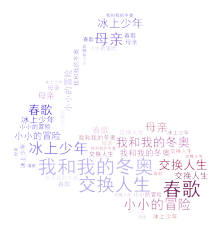

In [ ]:
import wordcloud
from PIL import Image
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path_font = '/content/drive/MyDrive/Github/Content/tools/articles/fonts/simhei.ttf'
path_image = "/content/drive/MyDrive/Github/Content/tools/articles/img/muscle-1085672_1280.png"
path_img = '/content/drive/MyDrive/Github/Content/tools/articles/img'
ls = df_focus_narrowed['片名'].to_list() + ls_ptitles 
# highlights
print(ls)

mask = np.array(Image.open(path_image)) # 定义词频背景
wc = wordcloud.WordCloud(

    font_path=path_font,
    mask=mask, # set back ground mask image
    max_words=44,
    max_font_size=144,
    background_color="rgba(255, 255, 255, 0)", mode="RGBA",
    repeat=True,
)
wc.generate(','.join(ls))

image_colors = wordcloud.ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show()

wc.to_file(path_img + '/img_title_' + issue_name + '.png')

##[2.5] 生成摘要
2021年4月28日，3月的电影备案公示发布，其中最遥远的是影剧备字〔2021〕第1360号的《幕后英雄》，最近期的是影特备字〔2021〕第006号的《熊猫传奇——黑洞之吻》，慷田AI聚焦、重点关注的项目有中国电影的《发明一个夏天》、光线的《计划外的姐弟恋》、《二郎神》、《土行孙之破土重生》、爱奇艺的《日常警事》以及阿里的《无价之宝》。

In [ ]:
df_focus_narrowed['单位简称'] = df_focus_narrowed['备案单位'].str.extract('('+ pat_public + ")")
df_f = df_focus_narrowed.groupby('单位简称')['片名'].apply(
    lambda x: '、'.join('《' + x + '》')).rename('关注影片').reset_index()
#####
S0 = '{year}年{month}月{day}日，'.format(year=pub_year, month=pub_month, day=pub_day)
S0 +=  '{month}月'.format(month=df_curr.loc[0,'公示批次起始'][1])
if df_curr.loc[0,'公示批次起始'][2] != '整月':
  S0 += '{duration}'.format(duration=df_curr.loc[0,'公示批次起始'][2])
S0 += '的电影备案公示发布，其中'
S0 += '最遥远的是{}的《{}》，'.format(df_curr_sorted.loc[0, '备案立项号'], df_curr_sorted.loc[0, '片名'])
S0 += '最近期的是{}的《{}》，'.format(df_curr_sorted.loc[df_curr.shape[0]-1, 
                                                 '备案立项号'], df_curr_sorted.loc[df_curr.shape[0]-1, '片名'])
S0 += '慷田AI聚焦关注的项目有'
for i, row in df_f.iterrows():
  if i == df_f.shape[0]-1:
    S0 = S0.rstrip('、')
    S0 += '以及{co}的{film}'.format(co=row['单位简称'], film=row['关注影片'])
  else:
    S0 += '{co}的{film}、'.format(co=row['单位简称'], film=row['关注影片'])
S0 += '。'
print(S0)

2021年7月2日，5月的电影备案公示发布，其中最遥远的是影重备字〔2019〕第6号的《大道同行》，最近期的是影剧备字〔2021〕第1916号的《落日迷情》，慷田AI聚焦关注的项目有儒意的《交换人生》、文投的《我和我的冬奥》以及横店的《春歌》。


##[2.6] 指向电影剧官网


In [ ]:
#####
T6 = '\n\n'
T6 += '\t慷田AI结合自主调研及多方大数据比对，通过分析、建模，提炼关键信息。'
T6 += '电影立项备案公示信息来自中国国家电影局 China Film Administration, 官方网址 '
T6 += ' http://www.chinafilm.gov.cn/chinafilm 。'

print(T6)



	慷田AI结合自主调研及多方大数据比对，通过分析、建模，提炼关键信息。电影立项备案公示信息来自中国国家电影局 China Film Administration, 官方网址  http://www.chinafilm.gov.cn/chinafilm 。


#[3] Output Word Document

## 3.1 Install and Load Libraries

In [ ]:
!pip install python-docx
!pip install lxml
from docx import Document
from docx.shared import Inches
#from docx.text.parargaph import Paragraph

     |████████████████████████████████| 5.6MB 12.1MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-cp37-none-any.whl size=184508 sha256=a51edd85c15bc3df73eae515ba7d4ac267e8ce017e27baee6d7c4762de94d5d9
  Stored in directory: /root/.cache/pip/wheels/a6/90/f1/a7cb70b38633ae04e7fb963b1c70f63fd6fc01c075b8230adc
Successfully built python-docx


## 3.2 Output Docx


In [ ]:
path_doc = '/content/drive/MyDrive/Github/Content/tools/articles/docx'
path_img = '/content/drive/MyDrive/Github/Content/tools/articles/img'

doc = Document()
doc.core_properties.title = 'China Movie Registration Overview ' + issue_name

doc.add_heading(T1, 0)

p = doc.add_paragraph(S0, style='Intense Quote')

doc.add_paragraph(T2)
doc.add_paragraph(T3)

doc.add_picture(path_img + '/img_title_' + issue_name + '.png', width =Inches(3))


table = doc.add_table(rows=1, cols=1, style='Light List Accent 4')
i = 1
for _, row in df_focus_narrowed.iterrows():
  row_cells = table.add_row().cells
  row_cells[0].text = '[' + str(i) + ']' + '《'.format(i) + row['片名'] + '》'

  row_cells = table.add_row().cells
  row_cells[0].text = '编剧: ' + row['编剧']

  row_cells = table.add_row().cells
  row_cells[0].text = '备案单位: ' + row['备案单位']

  row_cells = table.add_row().cells
  row_cells[0].text = row['梗概']

  row_cells = table.add_row().cells
  row_cells[0].text = ''
  i+=1

doc.add_paragraph(T6)

doc.save(path_doc + '/overview_' + issue_name + '.docx' )
